In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from scipy import signal
import random

# sns.set_style('whitegrid')

#### make the signals

In [2]:
# k is the wave number 
k = [random.uniform(0.5,1) for i in range(4)]

t_steps = 100000

t = np.arange(t_steps)*0.01 # 10 seconds
noise = np.random.normal(0,0.3,t_steps)
signal_no_noise = np.asarray([np.sin(k[0]*i)*np.sin(k[1]*i)*np.sin(k[2]*i)*np.sin(k[3]*i) for i in t])
signal_noisy = signal_no_noise + noise

plot the not noisy signal and the noisy signal

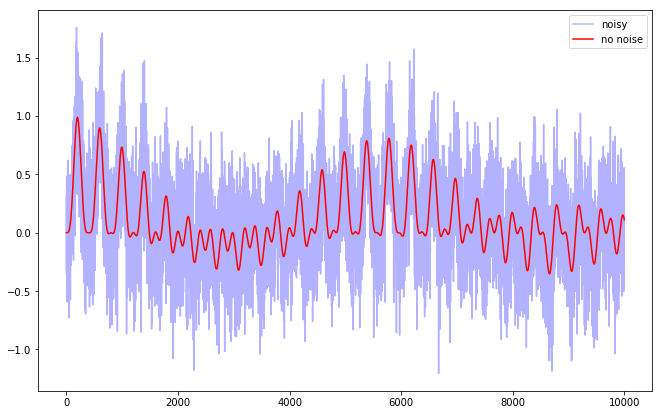

In [3]:
plt.figure(figsize=(11,7))

plt.plot(signal_noisy[:10000],'b-',label='noisy',alpha=0.3)
plt.plot(signal_no_noise[:10000],'r-',label='no noise')
plt.legend()

### Define some filters (convolutions)

In [4]:
# simple convolution, takes the signal and window size, returns filtered signal
def conv_1(sig, window):
    conv = np.repeat([0.,1.,0.], window)
    filtered = signal.convolve(sig, conv, mode='same') / window # normalising factor
    return filtered

# MMAV1
def mmav2(sig,window):
    conv = np.repeat([0.5,1.,0.5], window)
    filtered = signal.convolve(sig, conv, mode='same') / (2*window)
    return filtered

# MAVS - the slopey one
def mavs(sig,window):
    ar1 = np.asarray([4*k/ window for k in range(window//4)])
    ar2 = np.ones(window//2)
    ar3 = np.asarray([np.float(1 - 4*k/window) for k in range(window//4)])
    conv = np.concatenate([ar1,ar2,ar3])
    normalize = np.sum(conv)
    
    filtered = signal.convolve(sig, conv, mode='same') / normalize
    return filtered

def thresh(x,a):
    if x>a: return 1
    else: return 0

def willisen(sig,window):
    convolved = []
    for i in range(len(sig)-window):
        sa = np.sum([thresh(np.abs(sig[i+j] - sig[i+j+1]),0.0005) for j in range(window)])
        convolved.append(sa / window)
    return np.asarray(convolved)


In [5]:
print([np.abs(signal_noisy[i] - signal_noisy[i+1]) for i in range(20)])

[0.5334405388699769, 0.13430202310051167, 0.397680712682675, 0.3940288342807744, 0.40294898257265455, 0.40976058630089746, 0.3169065659120107, 0.6901921526733954, 0.013017977458000707, 0.5781276057819102, 0.26461807335929444, 0.047172516192166974, 0.8391128760768678, 0.32410477075524446, 0.24196293923877518, 0.0532943692500544, 0.1852427699897196, 0.6441628792463756, 0.7122200030957975, 0.12143271703660566]


### Apply the filters and compare them

In [6]:
filt1 = conv_1(signal_noisy, 100)
filt2 = mmav2(signal_noisy, 100)
filt3 = mavs(signal_noisy, 100)
input()
filt4 = willisen(signal_noisy, 25)
input("here")
filt5 = willisen(filt3, 25)


here


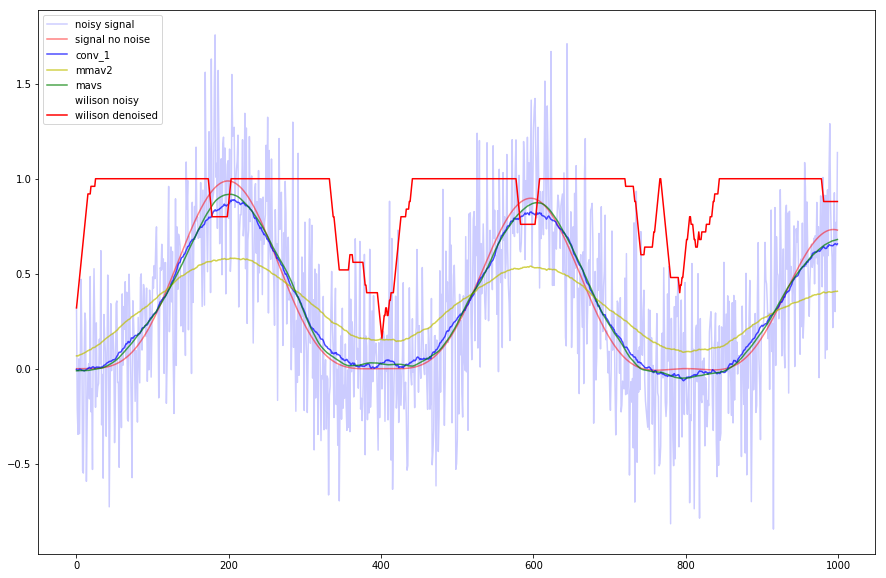

In [7]:
plt.figure(figsize=(15,10))
plt.plot(signal_noisy[:1000],'b-',label='noisy signal',alpha=0.2)
plt.plot(signal_no_noise[:1000],'r-',label='signal no noise',alpha=0.5)
plt.plot(filt1[:1000],'b-',label='conv_1',alpha=0.7)
plt.plot(filt2[:1000],'y-',label='mmav2',alpha=0.7)
plt.plot(filt3[:1000],'g-',label='mavs',alpha=0.7)

plt.plot(filt4[:1000],'b-',label='wilison noisy',alpha=0)
plt.plot(filt5[:1000],'r-',label='wilison denoised')

plt.legend()

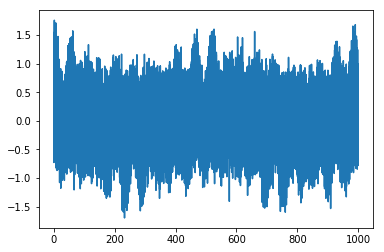

In [8]:
plt.plot(t,signal_noisy)

-----
# bilinear filter play
---


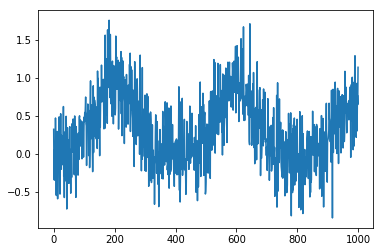

In [23]:
plt.plot(signal_noisy[:1000])
small = signal_noisy[:1000]

In [29]:
from scipy.signal import bilinear
from scipy.signal import cheby1

In [33]:
b,a = cheby1(2,4,100,'low',analog=True)

In [41]:
b,a = signal.cheby1(2,4,100,'low',analog=True)
w,h = signal.freqs(b,a)

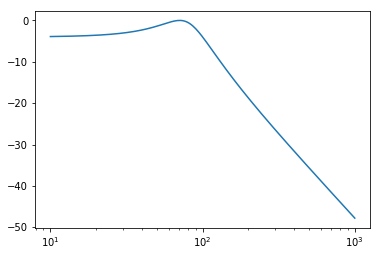

In [42]:
plt.semilogx(w,20*np.log10(abs(h)))

In [ ]:
plt.